## Demo notebook, pyeyesim library

this notebook is for testing and developing the PyEyeSim library for eye-movement comparison for looking at static images 

test with dependencies:
- xarray: 0.19.0
- pandas: 1.3.2
- numpy: 1.20.3
- matplotlib: 3.4.2
- scipy: 1.7.1 


### Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy import stats


### import PyEyeSim library

In [2]:
from PyEyeSim import pyeyesim_func as pysim


for development: changes should load automatically

In [3]:
%load_ext autoreload
%autoreload 2

##  Set file path and load data file 

In [13]:
MemoryStudy=1
GenderStudy=0
if GenderStudy:
    Filepath='/Volumes/GoogleDrive/My Drive/Vienna/CreaLab/GenderProject/GenderIIFemalePaint.csv'
    
    sizeX=2560
    sizeY=1600
     #StimN='Pa'
if MemoryStudy:

    Filepath='/Users/jarato/Documents/EyeTracking/MemoryStudyFix.csv'
    sizeX=1280
    sizeY=960


FixData=pd.read_csv(Filepath)
if Memory:
    FixData=FixData[FixData['Repetition']==1]
   # StimN='Stimulus'


#
#fixData=pd.read_csv(Filepath)
FixData

,Unnamed: 0,subjectID,Stimulus,Category,Repetition,mean_x,mean_y,length
0,0,1.0,5.0,7.0,1.0,427.388885,553.743713,270.0
1,1,1.0,5.0,7.0,1.0,782.835693,379.505615,286.0
2,2,1.0,5.0,7.0,1.0,701.805664,303.241455,280.0
3,3,1.0,5.0,7.0,1.0,864.697998,416.245056,382.0
4,4,1.0,5.0,7.0,1.0,382.930786,622.229553,312.0
...,...,...,...,...,...,...,...,...
157622,11,45.0,357.0,11.0,1.0,320.969360,458.779053,248.0
157623,12,45.0,357.0,11.0,1.0,528.981812,314.425323,308.0
157624,13,45.0,357.0,11.0,1.0,387.832642,302.768646,300.0
157625,14,45.0,357.0,11.0,1.0,806.179077,365.289215,296.0


set size of stimulus in pixels (if same for all)

## Descriptive function

returns:

- number of fixations (stimulus and participant)  (xarray format)

- stimulus names  (numpy array)

- subject codes  (numpy array)

- Mean X,Y location of fixations (xarray format)

- Mean SD X,Y of fixations  (xarray format)

- inferred stimulus boundaries (99% fixation locations - pandas format)

In [8]:

FixDataPrep=pysim.ProcessDat(fixData,StimName='Painting')
NFixations,Stimuli,Subjects,MeanFixXY,SDFixXY,Bounds=pysim.RunDescriptiveFix(FixDataPrep,Visual=1)

Data for  56 observers and  12  stimuli.
Mean fixation number:  76.81  +/-  11.44
Num of trials with zero fixations: 1
Num valid trials  671
Mean X location:  1302.47  +/-  53.02  pixels
Mean Y location:  771.54  +/-  78.3  pixels


Data for  45 observers and  48  stimuli.
Mean fixation number:  73.0  +/-  11.91
Mean fixation duration:  321.6  +/-  31.2 msec
Num of trials with zero fixations: 0
Num valid trials  2160
Mean X location:  652.5  +/-  31.3  pixels
Mean Y location:  472.8  +/-  30.9  pixels


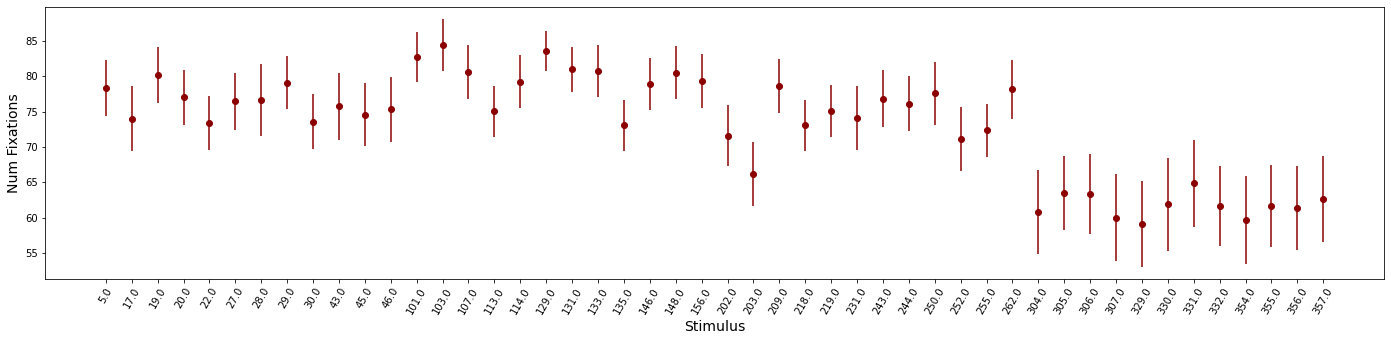

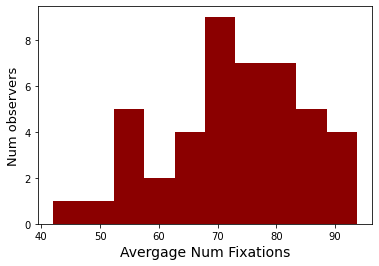

In [31]:

FixDataPrep=pysim.ProcessDat(fixData,StimName='Stimulus',FixDuration='length')
NFixations,Stimuli,Subjects,MeanFixXY,SDFixXY,Bounds=pysim.RunDescriptiveFix(FixDataPrep,Visual=1,duration=1)

In [26]:
FixDataPrep=pysim.ProcessDat(fixData,StimName='Stimulus',FixDuration='length')


In [25]:
#FixDataPrep

,Unnamed: 0,subjectID,Stimulus,Category,Repetition,mean_x,mean_y,duration
0,0,1.0,5.0,7.0,1.0,427.388885,553.743713,270.0
1,1,1.0,5.0,7.0,1.0,782.835693,379.505615,286.0
2,2,1.0,5.0,7.0,1.0,701.805664,303.241455,280.0
3,3,1.0,5.0,7.0,1.0,864.697998,416.245056,382.0
4,4,1.0,5.0,7.0,1.0,382.930786,622.229553,312.0
...,...,...,...,...,...,...,...,...
157685,11,45.0,357.0,11.0,5.0,284.285919,621.293579,312.0
157686,12,45.0,357.0,11.0,5.0,549.249329,801.407288,410.0
157687,13,45.0,357.0,11.0,5.0,489.137878,779.277893,290.0
157688,14,45.0,357.0,11.0,5.0,589.233337,750.899963,188.0


In [9]:
pysim.DescripitiveGroups(FixDataPrep,'PartGend')

Group  1 Female
Data for  27 observers and  12  stimuli.
Mean fixation number:  77.39  +/-  13.25
Num of trials with zero fixations: 1
Num valid trials  323
Mean X location:  1296.83  +/-  52.3  pixels
Mean Y location:  772.56  +/-  67.69  pixels
 
Group  2 Male
Data for  29 observers and  12  stimuli.
Mean fixation number:  76.26  +/-  9.41
Num of trials with zero fixations: 0
Num valid trials  348
Mean X location:  1307.72  +/-  53.15  pixels
Mean Y location:  770.59  +/-  87.01  pixels
 


,Stimulus,BoundX1,BoundX2,BoundY1,BoundY2
0,Bellini_Halbakt,415.560,2150.760,109.560,1639.440
1,Bouguereau_JungeFrau,905.475,1630.000,151.300,1569.350
2,Cranach_Venus,874.475,1762.000,97.000,1662.525
3,David_Recamier,267.160,2184.680,159.640,1510.840
4,Gentileschi_Maria,374.800,2298.100,111.500,1558.700
5,Goya_MajaAngezogen,197.900,2440.000,268.975,1522.050
6,Goya_MajaNacht,166.525,2451.250,316.000,1435.475
7,Ingres_Odaliske,123.500,2578.000,206.000,1540.250
8,Spiro_Halbakt,814.335,1879.000,209.335,1673.665
9,Valadon_Selbstbildnis,245.535,2254.395,103.070,1681.930


the advantage of xarray is named coordinates, that can also be indexed as a numpy array:


NFix.sel(subjectID='G_001',Painting='Spiro_Halbakt') 

NFix[0,8]

should give the same result


In [10]:
NFixations.sel(Stimulus='Spiro_Halbakt')

<xarray.DataArray (subjectID: 56)>
array([ 82.,  78.,  70., 100.,  62.,  75.,  87.,  88.,  82.,  80.,  71.,
        65.,  83.,  81.,  68.,  65.,  74.,  94.,  85.,  79.,  75.,  77.,
        82.,  78.,  78.,  79.,  80.,  92.,  82.,  84.,  62.,  12.,  73.,
        60.,  97.,  85.,  88.,  74.,  88.,  72.,  90.,  72.,  84.,  89.,
        99.,  92.,  40.,  92.,  69.,  48.,  81.,  64.,  73.,  60.,  57.,
        71.])
Coordinates:
  * subjectID  (subjectID) object 'G_001' 'G_002' 'G_003' ... 'P85_VF' 'P87_VF'
    Stimulus   <U13 'Spiro_Halbakt'

In [12]:
NFixations.sel(subjectID='G_001') 

<xarray.DataArray (Stimulus: 12)>
array([81., 79., 87., 75., 70., 80., 79., 80., 82., 73., 78., 80.])
Coordinates:
    subjectID  <U5 'G_001'
  * Stimulus   (Stimulus) object 'Bellini_Halbakt' ... 'Wittmann_Selbstbildnis'

## Saliency map for a given stimulus

SD parameter: smoothness in pixels

Vis parameter: whether plot shows up

In [13]:
Smap=pysim.SaliencyMap(FixDataPrep,'Bellini_Halbakt',sizeX,sizeY,SD=50,Vis=1)

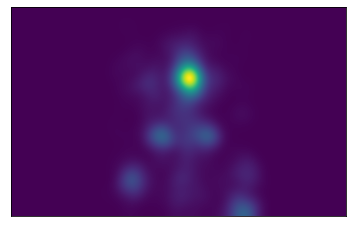

In [101]:
Smap=pysim.SaliencyMap(FixDataPrep,'Spiro_Halbakt',sizeX,sizeY,SD=50,Vis=1)

## Saliency map and entropy for multiple stimuli
### (slow)

todo: use only area with fixations for saliency map calculation

0 Bellini_Halbakt 415 2150 109 1639
0 Bellini_Halbakt entropy: 4.42 relative entropy 0.8
1 Bouguereau_JungeFrau 905 1630 151 1569
1 Bouguereau_JungeFrau entropy: 3.82 relative entropy 0.83
2 Cranach_Venus 874 1762 97 1662
2 Cranach_Venus entropy: 3.94 relative entropy 0.82
3 David_Recamier 267 2184 159 1510
3 David_Recamier entropy: 4.4 relative entropy 0.8
4 Gentileschi_Maria 374 2298 111 1558
4 Gentileschi_Maria entropy: 4.7 relative entropy 0.84
5 Goya_MajaAngezogen 197 2440 268 1522
5 Goya_MajaAngezogen entropy: 4.28 relative entropy 0.77
6 Goya_MajaNacht 166 2451 316 1435
6 Goya_MajaNacht entropy: 4.25 relative entropy 0.77
7 Ingres_Odaliske 123 2578 206 1540
7 Ingres_Odaliske entropy: 4.9 relative entropy 0.85
8 Spiro_Halbakt 814 1879 209 1673
8 Spiro_Halbakt entropy: 4.18 relative entropy 0.84
9 Valadon_Selbstbildnis 245 2254 103 1681
9 Valadon_Selbstbildnis entropy: 4.72 relative entropy 0.83
10 VanLoo_JungeFrau 735 1832 224 1583
10 VanLoo_JungeFrau entropy: 4.24 relative entro

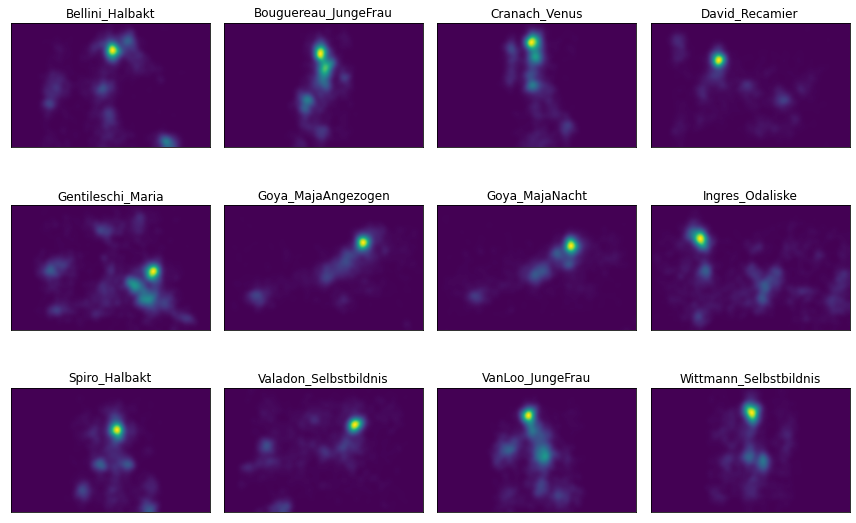

In [120]:
plt.figure(figsize=(12,8))
for cs,stim in enumerate(Stimuli):
    plt.subplot(3,4,cs+1)
    smap=pysim.SaliencyMap(FixDataPrep,stim,sizeX,sizeY,Ind=0,SD=35,Vis=1)
   # pysim.SaliencyPlot(smap,newfig=0)
    
    Fixcount=pysim.FixCountCalc(FixDataPrep,stim,sizeX,sizeY)
    Fixcount=np.sum(Fixcount,0)
    x1=int(Bounds['BoundX1'][Bounds['Stimulus']==stim])
    x2=int(Bounds['BoundX2'][Bounds['Stimulus']==stim])
    y1=int(Bounds['BoundY1'][Bounds['Stimulus']==stim])
    y2=int(Bounds['BoundY2'][Bounds['Stimulus']==stim])
    print(cs,stim,x1,x2,y1,y2)
    BinnedC=pysim.BinnedCount(Fixcount,x2,y2,x_size_start=x1,y_size_start=y1,binsize_h=100,binsize_v=100)
    plt.xticks([])
    plt.yticks([])
    Entr,RelativeEntr=pysim.Entropy(BinnedC)
    print(cs,stim,'entropy:',np.round(Entr,2),'relative entropy',np.round(RelativeEntr,2))
    plt.title(stim) 
plt.tight_layout()
    

0 5.0 75 1209 47 919
0 5.0 entropy: 3.83 relative entropy 0.86
1 17.0 59 1213 54 940
1 17.0 entropy: 3.68 relative entropy 0.82
2 19.0 65 1230 5 960
2 19.0 entropy: 4.34 relative entropy 0.94
3 20.0 74 1281 56 1120
3 20.0 entropy: 4.17 relative entropy 0.87
4 22.0 32 1278 10 946
4 22.0 entropy: 4.15 relative entropy 0.89
5 27.0 129 1166 -4 1012
5 27.0 entropy: 3.83 relative entropy 0.83
6 28.0 58 1226 122 1046
6 28.0 entropy: 4.13 relative entropy 0.9
7 29.0 38 1263 5 991
7 29.0 entropy: 4.25 relative entropy 0.91


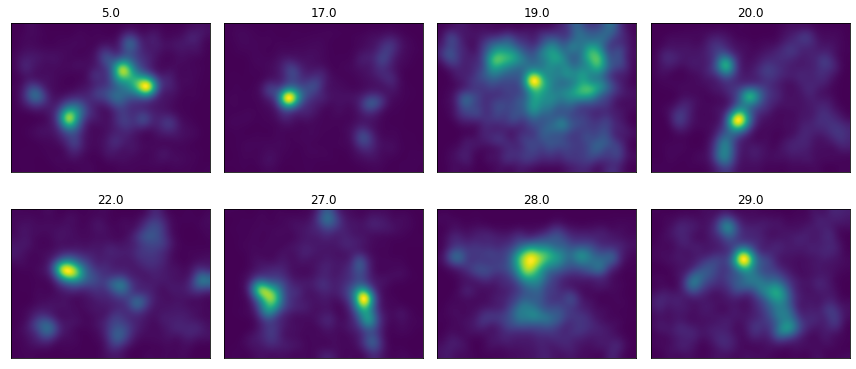

In [34]:
plt.figure(figsize=(12,8))
for cs,stim in enumerate(Stimuli[0:8]):
    plt.subplot(3,4,cs+1)
    smap=pysim.Heatmap(FixDataPrep,stim,sizeX,sizeY,Ind=0,SD=35,Vis=1)
   # pysim.SaliencyPlot(smap,newfig=0)
    
    Fixcount=pysim.FixCountCalc(FixDataPrep,stim,sizeX,sizeY)
    Fixcount=np.sum(Fixcount,0)
    x1=int(Bounds['BoundX1'][Bounds['Stimulus']==stim])
    x2=int(Bounds['BoundX2'][Bounds['Stimulus']==stim])
    y1=int(Bounds['BoundY1'][Bounds['Stimulus']==stim])
    y2=int(Bounds['BoundY2'][Bounds['Stimulus']==stim])
    print(cs,stim,x1,x2,y1,y2)
    BinnedC=pysim.BinnedCount(Fixcount,x2,y2,x_size_start=x1,y_size_start=y1,binsize_h=100,binsize_v=100)
    plt.xticks([])
    plt.yticks([])
    Entr,RelativeEntr=pysim.Entropy(BinnedC)
    print(cs,stim,'entropy:',np.round(Entr,2),'relative entropy',np.round(RelativeEntr,2))
    plt.title(stim) 
plt.tight_layout()
    

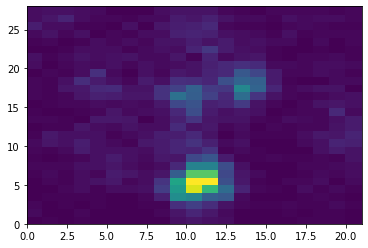

In [119]:
plt.pcolor(BinnedC)
